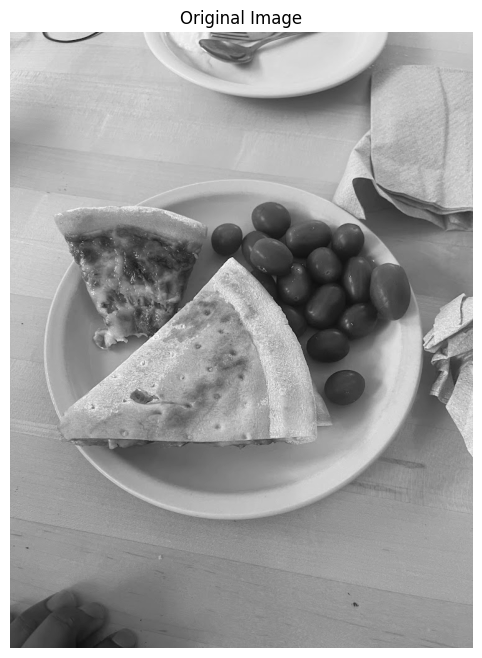

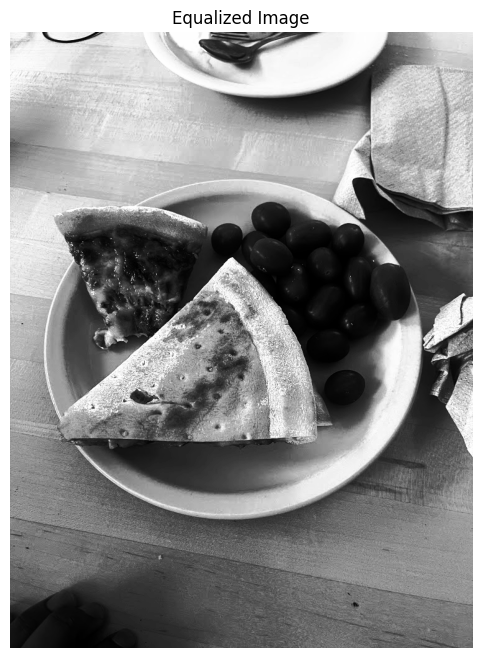

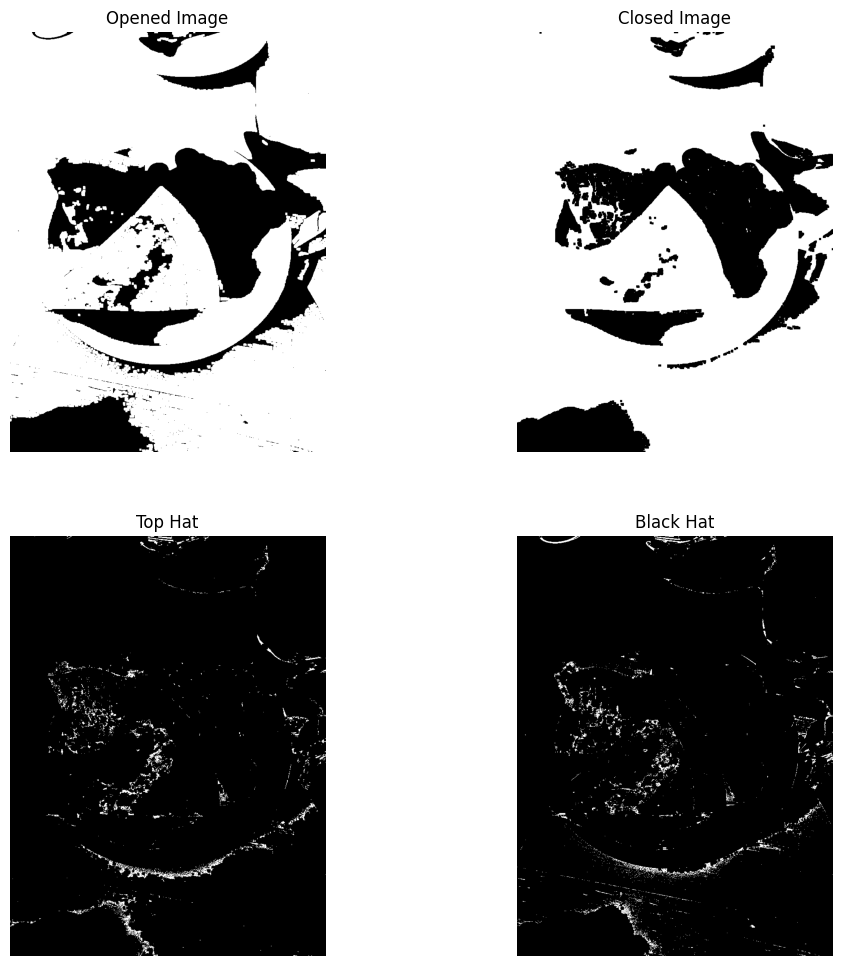

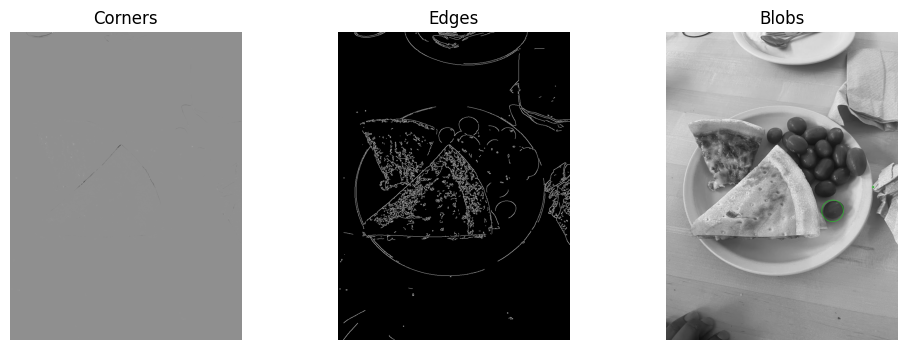

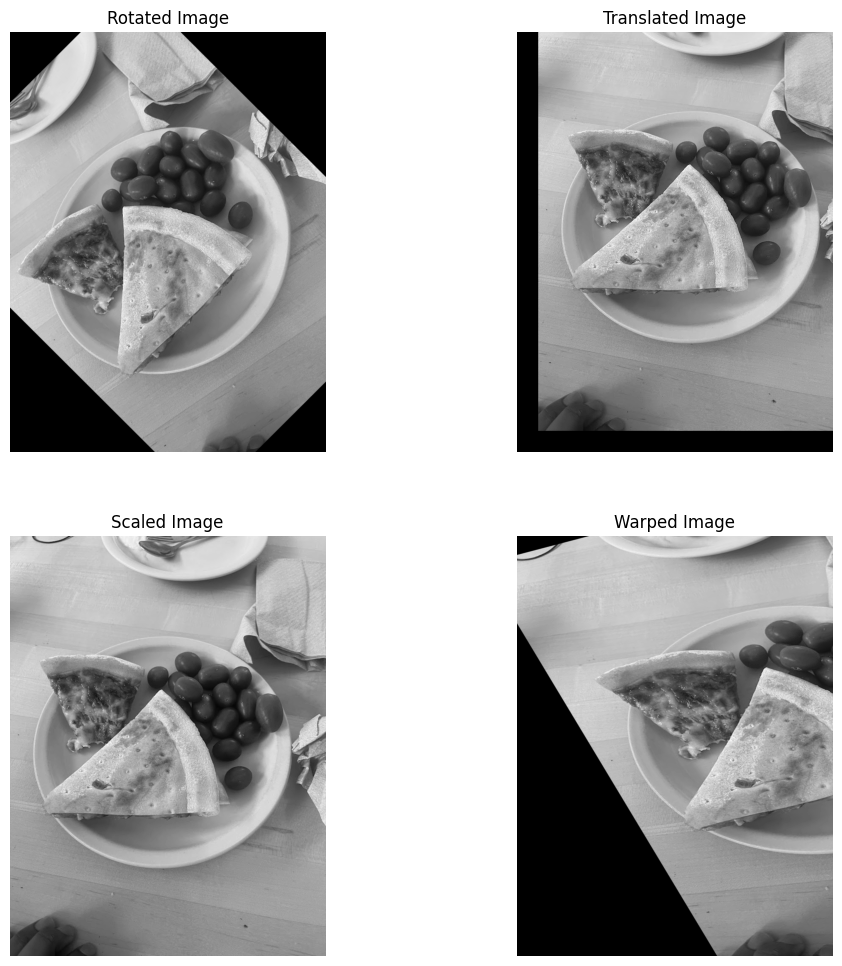

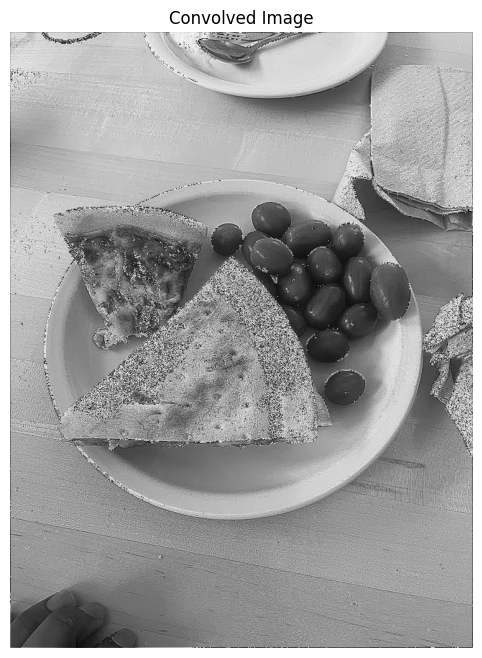

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


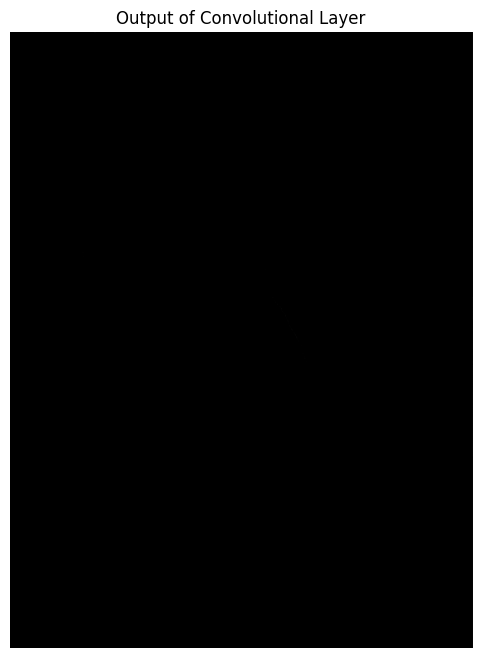

0.0 133.62755


In [10]:
import numpy as np
import cv2
from skimage import exposure
from scipy import ndimage
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras.preprocessing import image

# Load image
image = cv2.imread("pizza.jpeg", cv2.IMREAD_GRAYSCALE)

# Display original image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Histogram Equalization
def histogram_equalization(image):
    equalized_image = exposure.equalize_hist(image)
    return (equalized_image * 255).astype(np.uint8)

# Apply Histogram Equalization
equalized_image = histogram_equalization(image)

# Display equalized image
plt.figure(figsize=(8, 8))
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.show()

# Morphological Transformations
def morphological_operations(binary_image):
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))
    top_hat = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, np.ones((5,5),np.uint8))
    black_hat = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, np.ones((5,5),np.uint8))
    return opened_image, closed_image, top_hat, black_hat

# Convert to binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Apply Morphological Transformations
opened_image, closed_image, top_hat, black_hat = morphological_operations(binary_image)

# Display morphological transformations
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(opened_image, cmap='gray')
plt.title("Opened Image")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title("Closed Image")
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(top_hat, cmap='gray')
plt.title("Top Hat")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(black_hat, cmap='gray')
plt.title("Black Hat")
plt.axis('off')
plt.show()

# Feature Extraction from Images
def extract_features(image):
    corners = cv2.cornerHarris(image, 2, 3, 0.04)
    edges = cv2.Canny(image, 100, 200)
    keypoints = cv2.SimpleBlobDetector_create().detect(image)
    return corners, edges, keypoints

# Extract Features from Images
corners, edges, keypoints = extract_features(image)

# Display extracted features
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(corners, cmap='gray')
plt.title("Corners")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.drawKeypoints(image, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
plt.title("Blobs")
plt.axis('off')
plt.show()

# Perspective and Geometric Transformations
def geometric_transformations(image):
    rows, cols = image.shape[:2]
    
    # Rotation
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    
    # Translation
    translation_matrix = np.float32([[1, 0, 50], [0, 1, -50]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    
    # Scaling
    scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    
    # Perspective Warping
    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[10,100],[200,50],[100,250]])
    perspective_matrix = cv2.getAffineTransform(pts1, pts2)
    warped_image = cv2.warpAffine(image, perspective_matrix, (cols, rows))
    
    return rotated_image, translated_image, scaled_image, warped_image

# Perform Perspective and Geometric Transformations
rotated_image, translated_image, scaled_image, warped_image = geometric_transformations(image)

# Display geometric transformations
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(translated_image, cmap='gray')
plt.title("Translated Image")
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(scaled_image, cmap='gray')
plt.title("Scaled Image")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(warped_image, cmap='gray')
plt.title("Warped Image")
plt.axis('off')
plt.show()

# Implementing Convolution from Scratch
def convolution(image, kernel):
    return ndimage.convolve(image, kernel, mode='constant', cval=0.0)

# Example kernel for edge detection
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply Convolution from Scratch
convolved_image = convolution(image, kernel)

# Display convolved image
plt.figure(figsize=(8, 8))
plt.imshow(convolved_image, cmap='gray')
plt.title("Convolved Image")
plt.axis('off')
plt.show()

# Understanding and Applying Convolutional Layers
# def convolutional_layer(input_tensor, filter_size, num_filters, stride=1, padding='SAME'):
#     input_shape = input_tensor.shape
#     input_channels = input_shape[-1]
#     filter_shape = [filter_size, filter_size, input_channels, num_filters]
#     
#     weights = tf.Variable(tf.random.truncated_normal(filter_shape, stddev=0.1))
#     biases = tf.Variable(tf.constant(0.1, shape=[num_filters]))
#     
#     conv = tf.nn.conv2d(input_tensor, weights, strides=[1, stride, stride, 1], padding=padding)
#     conv_with_bias = tf.nn.bias_add(conv, biases)
#     conv_relu = tf.nn.relu(conv_with_bias)
#     
#     return conv_relu
# 
# # input_tensor = tf.placeholder(tf.float32, shape=[None, image.shape[0], image.shape[1], 1])
# # input_tensor = tf.keras.Input(tf.float32, shape=[None, image.shape[0], image.shape[1], 1])
# # input_tensor = tf.keras.Input(tf.float32, shape=(image.shape[0], image.shape[1], 1))
# input_tensor = tf.keras.Input(shape=(image.shape[0], image.shape[1], 1))
# 
# # Apply Convolutional Layer
# conv_layer_output = convolutional_layer(input_tensor, filter_size=3, num_filters=32)
# 
# # Start a TensorFlow session
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     output = sess.run(conv_layer_output, feed_dict={input_tensor: image.reshape(1, image.shape[0], image.shape[1], 1)})
#     
# # Display output of convolutional layer
# plt.figure(figsize=(8, 8))
# plt.imshow(output[0, :, :, 0], cmap='gray')
# plt.title("Output of Convolutional Layer")
# plt.axis('off')
# plt.show()


image = image.reshape(1, image.shape[0], image.shape[1], 1)  # Reshape to have 4D shape expected by Keras

# Create a Keras model with a single convolutional layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=image.shape[1:]))

model.compile(optimizer='adam', loss='categorical_crossentropy')

# Apply the convolutional layer
output = model.predict(image)

# Display output of convolutional layer
plt.figure(figsize=(8, 8))
# plt.imshow(output[0, :, :, 0], cmap='gray')
plt.imshow(output[0, :, :, 0], cmap='gray', vmin=0, vmax=255)
plt.title("Output of Convolutional Layer")
plt.axis('off')
plt.show()

print(output.min(), output.max())